In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sets_df = pd.read_csv("sets.csv")

In [3]:
themes_df = pd.read_csv("themes.csv")

In [4]:
colors_df = pd.read_csv("colors.csv")

In [5]:
sets_df.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

In [6]:
themes_df.columns

Index(['id', 'name', 'parent_id'], dtype='object')

In [7]:
colors_df.columns

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')

# The knowledge we seek

1) What is the most enormous LEGO set ever created and how many parts did it have?

2) In which year were the first LEGO sets released and how many sets did the company sell when it first launched?

3) Which LEGO theme has the most sets? Is it Harry Potter, Ninjago, Friends or something else?

4) When did the LEGO company really take-off based on its product offering? How many themes and sets did it release every year?

5) Did LEGO sets grow in size and complexity over time? Do older LEGO sets tend to have more or fewer parts than newer sets?



In [8]:
# How many unique colors do we have
colors_df.name.values # All the actual noted colors

array(['Unknown', 'Black', 'Blue', 'Green', 'Dark Turquoise', 'Red',
       'Dark Pink', 'Brown', 'Light Gray', 'Dark Gray', 'Light Blue',
       'Bright Green', 'Light Turquoise', 'Salmon', 'Pink', 'Yellow',
       'White', 'Light Green', 'Light Yellow', 'Tan', 'Light Violet',
       'Glow In Dark Opaque', 'Purple', 'Dark Blue-Violet', 'Orange',
       'Magenta', 'Lime', 'Dark Tan', 'Bright Pink', 'Medium Lavender',
       'Lavender', 'Trans-Black IR Lens', 'Trans-Dark Blue',
       'Trans-Green', 'Trans-Bright Green', 'Trans-Red', 'Trans-Black',
       'Trans-Light Blue', 'Trans-Neon Green', 'Trans-Very Lt Blue',
       'Trans-Dark Pink', 'Trans-Yellow', 'Trans-Clear', 'Trans-Purple',
       'Trans-Neon Yellow', 'Trans-Neon Orange', 'Chrome Antique Brass',
       'Chrome Blue', 'Chrome Green', 'Chrome Pink', 'Chrome Black',
       'Very Light Orange', 'Light Purple', 'Reddish Brown',
       'Light Bluish Gray', 'Dark Bluish Gray', 'Medium Blue',
       'Medium Green', 'Speckle Black-

In [9]:
print(f"Number of unique colors: {len(colors_df.name.unique())}")

Number of unique colors: 135


In [10]:
colors_df.nunique() # Unique values in each column

id          135
name        135
rgb         124
is_trans      2
dtype: int64

In [11]:
# How many colors are transparent as opposed to opaque

print("Transparency is the property that enables an element to allow light to pass through, making it see-through or partially visible ")

Transparency is the property that enables an element to allow light to pass through, making it see-through or partially visible 


In [12]:
print("Opaque objects absorb some or no light")

Opaque objects absorb some or no light


In [13]:
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [14]:
print("Find below the number of transparent and opaque colors:")
colors_df.is_trans.value_counts()

Find below the number of transparent and opaque colors:


f    107
t     28
Name: is_trans, dtype: int64

## What year was the first lego set released and what were these sets called? 

In [15]:
sets_df.sort_values(by="year")

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


In [16]:
sets_df.year.min() # The first release

1949

In [17]:
sets_df.query("year == 1949").iloc[0]['name'] # We found the earliest set released

'Extra-Large Gift Set (ABB)'

## How many different products did the LEGO company sell in their first year of operation?

In [18]:
# We know what the first year is: Refer to the above
 
sets_df.query("year == 1949") # We notice we have 2 unique sets based on theme 

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [19]:
sets_df.query("year == 1949").groupby("theme_id").count() 

,set_num,name,year,num_parts
theme_id,,,,
365,3,3,3,3
371,2,2,2,2


In [20]:

print("We find we have 3 sets of 1 theme and 2 sets of another theme")

We find we have 3 sets of 1 theme and 2 sets of another theme


## What are the top 5 LEGO sets with the most number of parts?

In [21]:
sets_df.sort_values(by="num_parts", ascending=False).head() # The top 5 sets ordered by most parts

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


## how many sets the LEGO company has published year-on-year. This might tell us something about how LEGO's product offering has changed over time.

<Axes: xlabel='year', ylabel='number of sets'>

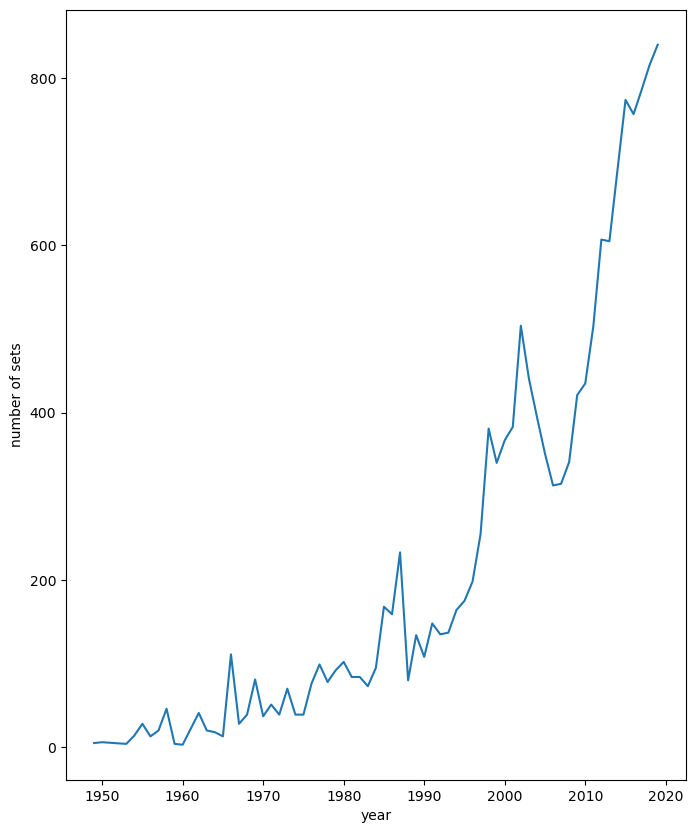

In [22]:
# We need sets per year excluding most current year in data as data is still being collected

sets_df.groupby("year")['set_num'].count()[0:69].plot(figsize=(8,10), ylabel="number of sets")

## we want to calculate the number of different themes by calendar year. 

In [23]:
# consider sql first groupby so that we have rows of the same year and sum each different theme within a year

In [24]:
sets_df.groupby(["year"]).agg({"theme_id": pd.Series.nunique})

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


## Create a line plot of the number of themes released year-on-year. Only include the full calendar years in the dataset (1949 to 2019).

In [25]:
set_themes_per_year = sets_df.groupby(["year"]).agg({"theme_id": pd.Series.nunique})

In [26]:
set_themes_per_year.rename(columns = {"theme_id": "num_of_themes"}, inplace=True)

In [27]:
set_themes_per_year

,num_of_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


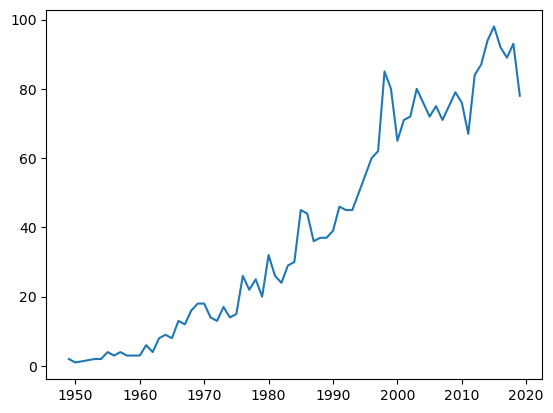

In [34]:
plt.plot(set_themes_per_year.index[:-2], set_themes_per_year.num_of_themes[:-2])

In [37]:
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


## Superimposing Line Charts with Separate Axes
Two Separate Axes

We need to be able to configure and plot our data on two separate axes on the same chart. This involves getting hold of an axis object from Matplotlib.

ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 
We then create another axis object: ax2. The key thing is that by using the .twinx() method allows ax1 and ax2 to share the same x-axis. When we plot our data on the axes objects we get this:




## Scatter Plots: Average Number of Parts per LEGO Set


### Complexity Over Time

### Have LEGO sets become larger and more complex over time? Let's work out the average number of parts per LEGO set

In [50]:
parts_per_set = sets_df[['year', 'num_parts']].groupby('year').agg("mean")

In [54]:
# We now have 2 numerical quantitative values, we can view their relationship via a scatter plot

In [55]:
parts_per_set.head()

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


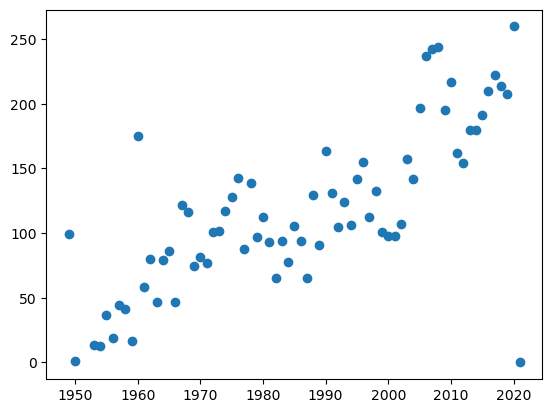

In [58]:
plt.scatter(x=parts_per_set.index, y=parts_per_set.num_parts)